In [1]:
from truncnormkde import *
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt

(100, 100, 1, 2) (1, 1, 8000, 2)
(1, 1, 1, 2) (1, 1, 1, 2) (1, 1, 1, 2)


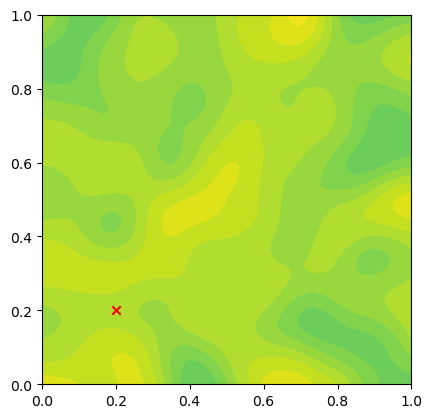

In [12]:
# Generate 8000 from truncated normal
N = 8000
mu = 0.2; sigma=0.2
#Xb = np.random.randn(N*10,2)*sigma + mu # N(0.2, 0.5)
Xb = np.random.rand(N,2)
Xb = Xb[ np.all( (Xb > 0) & (Xb < 1), axis=1) , :]
X = Xb[0:N,:]

# Bounds
a = jnp.array([0,0])
b = jnp.array([1,1])
bandwidth = compute_bandwidth(X) # Uses the scotts rule for computation

# Generate the evaluate grid
x,y = jnp.linspace(0,1,100), jnp.linspace(0,1,100)
x_2d, y_2d = jnp.meshgrid(x,y)
X_grid = jnp.stack([x_2d, y_2d],axis=-1)

# Define the object
KDE = BoundedKDE(a=a, b=b, bandwidth=bandwidth)

# Evaluate the KDE on the grid
computed_values = KDE(X_grid, X)


fig, ax = plt.subplots(1)
ax.contourf(x_2d, y_2d, computed_values, vmin=0.0)

ax.scatter([mu], [mu], c='r', marker='x')
#ax.set_xlim(0,1)
#ax.set_ylim(0,1)

ax.set_aspect('equal')
plt.show()

In [3]:
X_grid_re, X_re = KDE.reshape_tensors(X_grid, X)

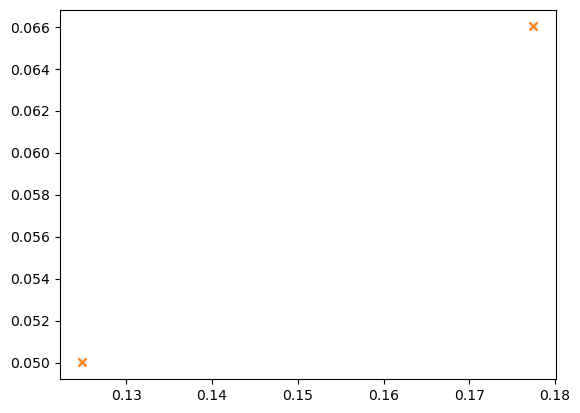

In [4]:
fig,ax = plt.subplots(1)
ax.scatter(X_re[0,0,0:2,0],X_re[0,0,0:2,1], alpha=0.1)
ax.scatter(X[0:2,0],X[0:2,1], marker='x')
plt.show()

In [5]:
L = 1000
XX_grid = X_grid.reshape(100,100,1,2)
XX = X[0:L,:].reshape(1,1,L,2)
sig_ = bandwidth.reshape(1,1,1,2)
high_ = b.reshape(1,1,1,2)
low_ = a.reshape(1,1,1,2)
Z = truncnorm(XX, mu=XX_grid, sigma=sig_, high=high_, low=low_).prod(axis=-1).mean(axis=-1)

(100, 100, 1, 2) (1, 1, 1000, 2)
(1, 1, 1, 2) (1, 1, 1, 2) (1, 1, 1, 2)


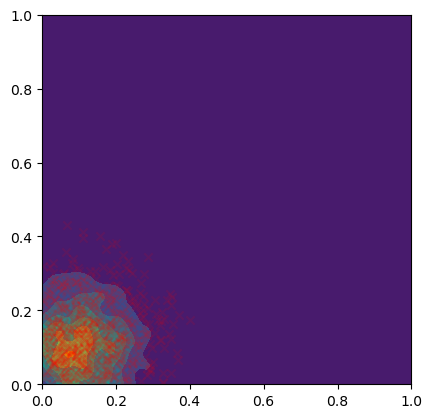

In [6]:
computed_values = KDE(X_grid, X[0:L,:])


fig, ax = plt.subplots(1)
ax.contourf(x_2d, y_2d, Z, vmin=0.0)

ax.scatter(X[0:L,0], X[0:L,1], c='r', marker='x', alpha=0.1)
ax.set_xlim(0,1)
ax.set_ylim(0,1)

ax.set_aspect('equal')
plt.show()

In [20]:
import scipy

mu=0.1; sig=0.1; a=0; b=1;
X = jnp.stack([scipy.stats.truncnorm.rvs(loc=mu, scale=sig, a=(a - mu)/sig, b=(b-mu)/sig, size=800)
           ,scipy.stats.truncnorm.rvs(loc=mu, scale=sig, a=(a - mu)/sig, b=(b-mu)/sig, size=800)]).T

X.shape

(800, 2)